In [1]:
# Distributions of height for the different positions in the 2018 FIFA World Cup
# Copyright 2018 Denis Meyer
# Data: Copyright 2018 FIFA

In [2]:
import logging
import requests
from tabula import read_pdf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Logging configuration
logging_loglevel = logging.DEBUG
logging_datefmt = '%d-%m-%Y %H:%M:%S'
logging_format = '[%(asctime)s] [%(levelname)-5s] [%(module)-20s:%(lineno)-4s] %(message)s'

In [4]:
# More options
# Newer versions available at 'https://img.fifa.com/image/upload/hzfqyndmnqazczvc5xdb.pdf'
inurl = 'https://dl.dropboxusercontent.com/s/ahf1o9z8ahetz8y/fifa_player_list.pdf?dl=0'
infile = 'fifa_player_list.pdf'
param_pos = 'POS'
param_height = 'Height'

In [5]:
def initialize_logger():
    logging.basicConfig(level=logging_loglevel,
                        format=logging_format,
                        datefmt=logging_datefmt)

In [6]:
def to_position(argument):
    switcher = {
        'GK': 'Goalkeeper',
        'DF': 'Defender',
        'MF': 'Midfielder',
        'FW': 'Forward'
    }
    return switcher.get(argument, 'Undefined')

In [7]:
def download(url, in_fname):
    r = requests.get(url, stream=True)
    with open(in_fname, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk:
                f.write(chunk)

In [8]:
def read_data(in_fname):
    logging.debug('Reading data from "{}"'.format(in_fname))
    return read_pdf(in_fname, pages='all')

In [9]:
def clean_up(df):
    logging.debug('Cleaning up')
    positions = [name for name, group in df.groupby(param_pos)]
    try:
        del positions[positions.index(param_pos)]
    except ValueError:
        pass
    df_clean = df[df[param_pos].isin(positions)]
    df_clean = df_clean[df_clean[param_height].apply(lambda x: not pd.isnull(x) and (
        (type(x) == str and x.isnumeric()) or (type(x) == float == int or type(x) == float)))]
    df_clean[param_height] = df_clean[param_height].apply(pd.to_numeric)
    df_clean[param_pos] = df_clean[param_pos].apply(to_position)
    return df_clean

In [10]:
def plot(df):
    logging.debug('Plotting')
    snsplot = sns.boxplot(y=param_height, x=param_pos,
                          data=df,
                          width=0.5,
                          palette='colorblind')
    snsplot = sns.stripplot(y=param_height, x=param_pos,
                            data=df,
                            jitter=True,
                            marker='o',
                            alpha=0.5,
                            color='black')
    snsplot.axes.set_title(
        'Distributions of height for the different positions in the 2018 FIFA World Cup', fontsize=16)
    snsplot.set_xlabel('Position', fontsize=14)
    snsplot.set_ylabel('Height (in cm)', fontsize=14)
    snsplot.tick_params(labelsize=10)
    fig = snsplot.get_figure()
    fig.set_size_inches(12, 8)
    plt.show()

In [11]:
initialize_logger()

In [12]:
download(inurl, infile)

[25-06-2018 19:02:14] [DEBUG] [connectionpool      :824 ] Starting new HTTPS connection (1): dl.dropboxusercontent.com
[25-06-2018 19:02:15] [DEBUG] [connectionpool      :396 ] https://dl.dropboxusercontent.com:443 "GET /s/ahf1o9z8ahetz8y/fifa_player_list.pdf?dl=0 HTTP/1.1" 200 575920


In [13]:
df = read_data(infile)

[25-06-2018 19:02:15] [DEBUG] [<ipython-input-8-3f192ec79bec>:2   ] Reading data from "fifa_player_list.pdf"


In [14]:
df_clean = clean_up(df)

[25-06-2018 19:02:30] [DEBUG] [<ipython-input-9-9aeeef137fc7>:2   ] Cleaning up


[25-06-2018 19:02:30] [DEBUG] [<ipython-input-10-e7dfe693be46>:2   ] Plotting
[25-06-2018 19:02:30] [DEBUG] [font_manager        :1354] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/denmeyer/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
[25-06-2018 19:02:30] [DEBUG] [font_manager        :1354] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to DejaVu Sans ('/Users/denmeyer/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
[25-06-2018 19:02:30] [DEBUG] [font_manager        :1354] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('/Users/denmeyer/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


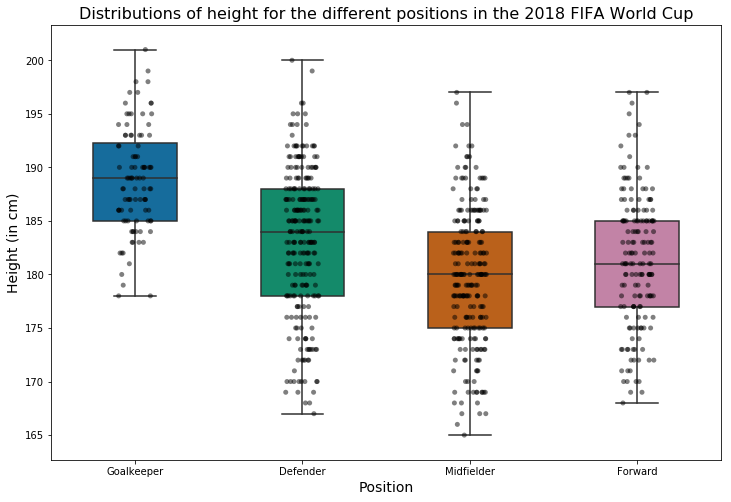

In [15]:
plot(df_clean)